## Data Description

This data will be used to conduct a detailed exploratory data analysis on christmas sales and trends.
**Columns Description**:

* Date (Date of the transaction, format: YYYY-MM-DD)
* Time (Time of the transaction, format: HH:MM:SS)
* CustomerID (Unique identifier for each customer)
* Age (Age of the customer)
* Gender (Gender of the customer: Male, Female, Other)
* Location (City or town where the purchase was made)
* StoreID (Unique identifier for the store, if applicable)
* OnlineOrderFlag (Boolean: True if online, False if in-store)
* ProductID (Unique identifier for the product)
* ProductName (Name of the product)
* Category (Category of the product, e.g., Electronics, Clothing, Toys, Food, Decorations)
* Quantity (Number of items purchased in the transaction)
* UnitPrice (Price per unit of the product)
* TotalPrice (Total price for the product, calculated as Quantity * UnitPrice)
* PaymentType (Type of payment, e.g., Credit Card, Debit Card, Cash, Online Payment)
* PromotionApplied (Boolean: True if any promotion was applied, False otherwise)
* DiscountAmount (The amount of discount, if any)
* GiftWrap (Boolean: True if the product was gift-wrapped, False otherwise)
* ShippingMethod (Method of shipping, e.g., Standard, Express, Overnight, if online)
* DeliveryTime (Number of days taken for delivery, if online)
* Weather (General weather condition on the day of purchase, e.g., Snowy, Rainy, Sunny)
* Event (Special events on the purchase day, e.g., Christmas Market, Black Friday)
* CustomerSatisfaction (Customer satisfaction rating, on a scale of 1-5)
* ReturnFlag (Boolean: True if the product was returned, False otherwise)

## Import the libraries to use

In [1]:
# Libraries for data manipulation
import numpy as np 
import pandas as pd 
import datetime
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Libraries for data manipulation

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Enable display of all rows and all columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Set the font size, font weight, and dpi of the figures
plt.rcParams['figure.figsize'] = 10,6
plt.rcParams['font.size'] = 6
plt.rcParams['font.weight'] = 'bold'

# Supress warnings in the outputs
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/christmas-sales-and-trends/Christmas Sales and Trends.csv


## Import the data to use

In [2]:
xmas = pd.read_csv("/kaggle/input/christmas-sales-and-trends/Christmas Sales and Trends.csv")

## Data Overview

In [3]:
xmas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

* The data has a mix of variables with integer, string (object) and decimal (float) data type.
* It is consuming 1.6+ MB of memory.
* It contains 25 columns and 10000 rows.

In [4]:
xmas.dtypes

TransactionID             int64
Date                     object
Time                     object
CustomerID                int64
Age                       int64
Gender                   object
Location                 object
StoreID                 float64
OnlineOrderFlag            bool
ProductID                 int64
ProductName              object
Category                 object
Quantity                  int64
UnitPrice               float64
TotalPrice              float64
PaymentType              object
PromotionApplied           bool
DiscountAmount          float64
GiftWrap                   bool
ShippingMethod           object
DeliveryTime            float64
Weather                  object
Event                    object
CustomerSatisfaction      int64
ReturnFlag                 bool
dtype: object

In [5]:
# Check the first five rows of the data
xmas.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,ProductName,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,12/24/2020,7:27:59,441,27,Other,City_15,NaN,True,106,Toys_Product,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,11/18/2022,14:36:39,340,43,Male,City_13,NaN,True,816,Clothing_Product,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,12/26/2019,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing_Product,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,11/13/2018,23:08:08,39,64,Male,City_20,100.0,False,710,Toys_Product,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,12/13/2020,4:38:08,344,26,Other,City_10,90.0,False,687,Toys_Product,Toys,3,57.384041,172.152122,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [6]:
# Check the last five rows of the data
xmas.tail()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,ProductName,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
9995,9996,12/21/2022,12:05:06,245,25,Other,City_10,NaN,True,54,Decorations_Product,Decorations,1,91.072121,91.072121,Credit Card,False,9.107212,True,Express,4.0,Sunny,Black Friday,4,False
9996,9997,11/24/2022,17:28:29,295,46,Female,City_17,NaN,True,324,Electronics_Product,Electronics,1,41.538590,41.538590,Debit Card,True,4.153859,True,Express,5.0,Rainy,Black Friday,2,True
9997,9998,11/2/2021,23:20:58,202,46,Female,City_13,22.0,False,892,Food_Product,Food,3,24.561093,73.683280,Cash,True,7.368328,True,NaN,NaN,Snowy,Black Friday,2,False
9998,9999,11/11/2020,11:33:17,310,64,Other,City_8,NaN,True,237,Electronics_Product,Electronics,3,20.334764,61.004291,Online Payment,True,0.000000,True,Express,1.0,Sunny,Christmas Market,1,False
9999,10000,11/16/2022,17:01:01,469,39,Female,City_15,NaN,True,490,Electronics_Product,Electronics,4,82.007183,328.028730,Cash,True,0.000000,True,Overnight,2.0,Snowy,Christmas Market,2,True


In [7]:
# Check the shape of the data
xmas.shape

(10000, 25)

## List the ful column names of the datasets


In [8]:
xmas.columns.values.tolist()

['TransactionID',
 'Date',
 'Time',
 'CustomerID',
 'Age',
 'Gender',
 'Location',
 'StoreID',
 'OnlineOrderFlag',
 'ProductID',
 'ProductName',
 'Category',
 'Quantity',
 'UnitPrice',
 'TotalPrice',
 'PaymentType',
 'PromotionApplied',
 'DiscountAmount',
 'GiftWrap',
 'ShippingMethod',
 'DeliveryTime',
 'Weather',
 'Event',
 'CustomerSatisfaction',
 'ReturnFlag']

## Count of categories

In [9]:
xmas.Category.nunique()

5

* There are 5 unique categories in the data.

## Data Cleaning and Preprocessing

### Create a backup of the data

In [10]:
df = xmas.copy()

### Check for duplicate values


In [11]:
sum(df.duplicated())

0

* There are no duplicates present.

## Check for missing values

In [12]:
df.isnull().sum()

TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64

In [13]:
# Express the missing values in the Data Frame as a percentage of the total number of rows
df.isnull().sum()/len(df)*100

TransactionID            0.00
Date                     0.00
Time                     0.00
CustomerID               0.00
Age                      0.00
Gender                   0.00
Location                 0.00
StoreID                 54.18
OnlineOrderFlag          0.00
ProductID                0.00
ProductName              0.00
Category                 0.00
Quantity                 0.00
UnitPrice                0.00
TotalPrice               0.00
PaymentType              0.00
PromotionApplied         0.00
DiscountAmount           0.00
GiftWrap                 0.00
ShippingMethod          45.82
DeliveryTime            45.82
Weather                  0.00
Event                   28.38
CustomerSatisfaction     0.00
ReturnFlag               0.00
dtype: float64

* Columns such as StoreID, ShippingMethod, DeliveryTime, and Event have missing values.

## Check for complete values

In [14]:
df.notnull().sum()

TransactionID           10000
Date                    10000
Time                    10000
CustomerID              10000
Age                     10000
Gender                  10000
Location                10000
StoreID                  4582
OnlineOrderFlag         10000
ProductID               10000
ProductName             10000
Category                10000
Quantity                10000
UnitPrice               10000
TotalPrice              10000
PaymentType             10000
PromotionApplied        10000
DiscountAmount          10000
GiftWrap                10000
ShippingMethod           5418
DeliveryTime             5418
Weather                 10000
Event                    7162
CustomerSatisfaction    10000
ReturnFlag              10000
dtype: int64

### Remove unneeded columns

In [15]:
cols_to_remove = ["StoreID","TransactionID","ProductID"]
df.drop(cols_to_remove,inplace = True, axis = 1)

## Deal with missing values

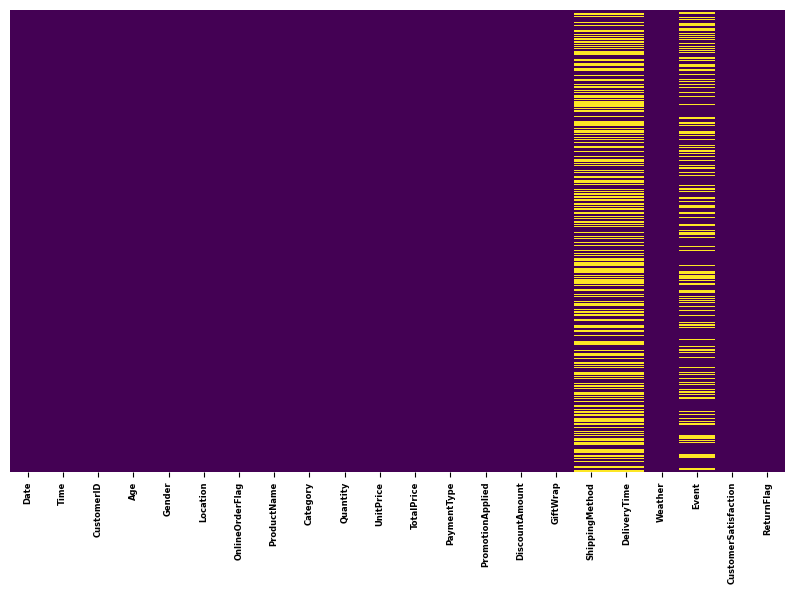

In [16]:
# Visualise the missing value
sns.heatmap(df.isnull(),cmap = 'viridis',cbar = False,
           yticklabels = False);

## Replace missing values in the ShippingMethod and Event columns with 'unknown'

In [17]:
df['ShippingMethod'].replace(np.nan,
                            'unknown', inplace = True)

In [18]:
df['Event'].replace(np.nan,
                            'unknown', inplace = True)

## Replace missing values in the DeliveryTime column with zero

In [19]:
df['DeliveryTime'].fillna(0,inplace = True)

In [20]:
# Check the columns for missing values again
df.isnull().sum()

Date                    0
Time                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
OnlineOrderFlag         0
ProductName             0
Category                0
Quantity                0
UnitPrice               0
TotalPrice              0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
GiftWrap                0
ShippingMethod          0
DeliveryTime            0
Weather                 0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
dtype: int64

## Create a datetime column by merging the Date and Time columns

In [21]:
df['DateTime'] = df.Date + ' '+ df.Time

In [22]:
#df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M:%S'))

### Split the date and time columns into separate columns

In [23]:
df[["Day","Month","Year"]] = df["Date"].str.split('/',expand = True)

In [24]:
df[["Hour","Minute","Second"]] = df["Time"].str.split(':',expand = True)

## Rename the TotalPrice columns as TotalRevenue

In [25]:
df.rename({'TotalPrice':'TotalRevenue'},axis =1,
         inplace =True)

In [26]:
# Check the data after the splitting is done
df.head(7)

,Date,Time,CustomerID,Age,Gender,Location,OnlineOrderFlag,ProductName,Category,Quantity,UnitPrice,TotalRevenue,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag,DateTime,Day,Month,Year,Hour,Minute,Second
0,12/24/2020,7:27:59,441,27,Other,City_15,True,Toys_Product,Toys,5,96.786255,483.931273,Credit Card,False,0.000000,False,Standard,5.0,Snowy,unknown,5,False,12/24/2020 7:27:59,12,24,2020,7,27,59
1,11/18/2022,14:36:39,340,43,Male,City_13,True,Clothing_Product,Clothing,1,95.279579,95.279579,Credit Card,True,0.000000,True,Express,3.0,Sunny,unknown,2,True,11/18/2022 14:36:39,11,18,2022,14,36,39
2,12/26/2019,20:23:50,31,25,Other,City_7,False,Clothing_Product,Clothing,2,52.371645,104.743291,Credit Card,False,0.000000,False,unknown,0.0,Rainy,Christmas Market,4,False,12/26/2019 20:23:50,12,26,2019,20,23,50
3,11/13/2018,23:08:08,39,64,Male,City_20,False,Toys_Product,Toys,5,63.647293,318.236463,Debit Card,False,0.000000,True,unknown,0.0,Rainy,unknown,1,True,11/13/2018 23:08:08,11,13,2018,23,08,08
4,12/13/2020,4:38:08,344,26,Other,City_10,False,Toys_Product,Toys,3,57.384041,172.152122,Cash,False,0.000000,True,unknown,0.0,Sunny,Christmas Market,4,False,12/13/2020 4:38:08,12,13,2020,4,38,08
5,11/26/2018,3:17:17,307,18,Male,City_4,False,Decorations_Product,Decorations,1,81.058986,81.058986,Online Payment,True,8.105899,True,unknown,0.0,Rainy,Black Friday,3,True,11/26/2018 3:17:17,11,26,2018,3,17,17
6,12/8/2020,8:26:56,368,63,Female,City_3,True,Food_Product,Food,3,48.157542,144.472627,Online Payment,False,0.000000,True,Express,2.0,Sunny,Christmas Market,3,True,12/8/2020 8:26:56,12,8,2020,8,26,56


# Some Data Wrangling

## Data subsetting

In [27]:
# Create a Data Frame for 2020 transactions
df_2020 = df[df["Year"]==2020]


In [28]:
# Create a Data Frame for 2021 transactions
df_2021 = df[df["Year"]==2021]


In [29]:
# Create a Data Frame for 2022 transactions
df_2022 = df[df["Year"]==2022]


In [30]:
# Create a Data Frame for 2023 transactions
df_2023 = df[df["Year"]==2023]


In [31]:
# Create a Data Frame for Xmas day of 2020 transactions
xmas_2020 = df[(df['Year']==2020)&(df['Day']==25)]
#xmas_2020 = df.loc[(df['Year']=2020)&(df['Day']=25)]

In [32]:
# Create a Data Frame for Xmas day of 2021 transactions
xmas_2021 = df[(df['Year']==2021)&(df['Day']==25)]

In [33]:
# Create a Data Frame for Xmas day of 2022 transactions
xmas_2022 = df[(df['Year']==2022)&(df['Day']==25)]

## Value Counts: Number of unique values in a categorical column

In [34]:
# Value count of Gender
gender_value_counts = df.Gender.value_counts()
gender_value_counts

Gender
Male      3385
Other     3317
Female    3298
Name: count, dtype: int64

In [35]:
# Value count of Location
location_value_counts = df.Location.value_counts()
location_value_counts

Location
City_13    550
City_12    517
City_18    516
City_1     516
City_14    515
City_4     512
City_3     511
City_8     508
City_19    508
City_15    505
City_6     503
City_11    499
City_2     499
City_5     497
City_20    492
City_9     487
City_16    480
City_10    479
City_7     458
City_17    448
Name: count, dtype: int64

In [36]:
# Value count of OnlineOrderFlag
onlineorderflag_value_counts = df.OnlineOrderFlag.value_counts()
onlineorderflag_value_counts

OnlineOrderFlag
True     5418
False    4582
Name: count, dtype: int64

In [37]:
# Value count of Category
Category_value_counts = df.Category.value_counts()
Category_value_counts

Category
Electronics    2053
Toys           2011
Decorations    1995
Food           1991
Clothing       1950
Name: count, dtype: int64

In [38]:
# Value count of PaymentType
PaymentType_value_counts = df.PaymentType.value_counts()
PaymentType_value_counts

PaymentType
Cash              2540
Online Payment    2536
Credit Card       2497
Debit Card        2427
Name: count, dtype: int64

In [39]:
# Value count of PromotionApplied (expressed in %)
PromotionApplied_value_counts = df.PromotionApplied.value_counts(normalize = True)*100
PromotionApplied_value_counts

PromotionApplied
True     50.41
False    49.59
Name: proportion, dtype: float64

In [40]:
# Value count of GiftWrap
GiftWrap_value_counts = df.GiftWrap.value_counts()
GiftWrap_value_counts


GiftWrap
True     5025
False    4975
Name: count, dtype: int64

In [41]:
# Value count of ShippingMethod
ShippingMethod_value_counts = df.ShippingMethod.value_counts()
ShippingMethod_value_counts


ShippingMethod
unknown      4582
Express      1819
Overnight    1809
Standard     1790
Name: count, dtype: int64

In [42]:
# Value count of Event
Event_value_counts = df.Event.value_counts()
Event_value_counts

Event
Black Friday        4254
Christmas Market    2908
unknown             2838
Name: count, dtype: int64

In [43]:
# Value count of CustomerSatisfaction
CustomerSatisfaction_value_counts = df.CustomerSatisfaction.value_counts()
CustomerSatisfaction_value_counts

CustomerSatisfaction
1    2070
4    1991
3    1991
5    1974
2    1974
Name: count, dtype: int64

## Cross Tabulation

In [44]:
# Crosstab of Gender and Category
gender_cat_crosstab = pd.crosstab(df.Gender,df.Category)
gender_cat_crosstab

Category,Clothing,Decorations,Electronics,Food,Toys
Gender,,,,,
Female,646,661,655,643,693
Male,656,651,715,688,675
Other,648,683,683,660,643


In [45]:
# Crosstab of Category and PaymentType
cat_pay_crosstab = pd.crosstab(df.Category,
                               df.PaymentType)
cat_pay_crosstab

PaymentType,Cash,Credit Card,Debit Card,Online Payment
Category,,,,
Clothing,512,495,470,473
Decorations,500,503,484,508
Electronics,525,501,493,534
Food,503,488,486,514
Toys,500,510,494,507


In [46]:
# Crosstab of GiftWrap and Event
gift_event_crosstab = pd.crosstab(df.GiftWrap,
                               df.Event, margins = True)
gift_event_crosstab

Event,Black Friday,Christmas Market,unknown,All
GiftWrap,,,,
False,2118,1428,1429,4975
True,2136,1480,1409,5025
All,4254,2908,2838,10000


In [47]:
# Crosstab of ShippingMethod and Weather
ship_weather_crosstab = pd.crosstab(df.ShippingMethod,
                               df.Weather,margins = True)
ship_weather_crosstab

Weather,Rainy,Snowy,Sunny,All
ShippingMethod,,,,
Express,614,588,617,1819
Overnight,612,615,582,1809
Standard,607,603,580,1790
unknown,1575,1518,1489,4582
All,3408,3324,3268,10000


In [48]:
# Crosstab of CustomerSatisfaction and ReturnFlag
satisfaction_return_crosstab = pd.crosstab(df.CustomerSatisfaction,
                               df.ReturnFlag)
satisfaction_return_crosstab

ReturnFlag,False,True
CustomerSatisfaction,,
1,1017,1053
2,983,991
3,934,1057
4,1005,986
5,1007,967


In [49]:
# Crosstab of ProductName and GiftWrap
product_giftwarp_crosstab = pd.crosstab(df.ProductName,
                               df.GiftWrap)
satisfaction_return_crosstab

ReturnFlag,False,True
CustomerSatisfaction,,
1,1017,1053
2,983,991
3,934,1057
4,1005,986
5,1007,967


## Groupby

In [50]:
# Total revenue grouped by year
year_rev_group = df.groupby("Year")["TotalRevenue"].sum()\
.reset_index()
year_rev_group

,Year,TotalRevenue
0,2018,284186.345216
1,2019,267035.542074
2,2020,272851.257211
3,2021,276911.945692
4,2022,267099.899433
5,2023,286175.158612


In [51]:
# Total revenue grouped by payment type
pay_rev_group = df.groupby("PaymentType")["TotalRevenue"].sum()\
.reset_index()
pay_rev_group

,PaymentType,TotalRevenue
0,Cash,421579.300188
1,Credit Card,421512.175000
2,Debit Card,402184.337400
3,Online Payment,408984.335652


In [52]:
# Check the class of the output
type(pay_rev_group)

pandas.core.frame.DataFrame

In [53]:
# Total revenue grouped by shipping method
ship_rev_group = df.groupby("ShippingMethod")["TotalRevenue"].sum()\
.reset_index()
ship_rev_group

,ShippingMethod,TotalRevenue
0,Express,301810.712985
1,Overnight,299338.317100
2,Standard,299707.558039
3,unknown,753403.560117


In [54]:
# Average revenue grouped by genders
gender_rev_group = df.groupby("Gender")["TotalRevenue"].mean()\
.reset_index()
gender_rev_group

,Gender,TotalRevenue
0,Female,166.436676
1,Male,163.002955
2,Other,166.893877


In [55]:
# Average revenue grouped by weather
weather_rev_group = df.groupby("Weather")["TotalRevenue"].mean()\
.reset_index()
weather_rev_group

,Weather,TotalRevenue
0,Rainy,169.138925
1,Snowy,163.070804
2,Sunny,163.949614


In [56]:
# Average age grouped by category
cat_age_group = df.groupby("Category")["Age"].mean()\
.reset_index()
cat_age_group

,Category,Age
0,Clothing,43.938974
1,Decorations,43.458647
2,Electronics,43.898198
3,Food,43.799096
4,Toys,43.863252


In [57]:
# Total quantity by location
qty_location_group = df.groupby("Location")["Quantity"].mean()\
.reset_index()
qty_location_group

,Location,Quantity
0,City_1,3.044574
1,City_10,2.956159
2,City_11,2.981964
3,City_12,3.027079
4,City_13,3.129091
5,City_14,2.986408
6,City_15,3.029703
7,City_16,2.916667
8,City_17,3.006696
9,City_18,3.029070


In [58]:
# Number of items in each category
cat_count = df.groupby(["Category"])["Category"].count()
cat_count

Category
Clothing       1950
Decorations    1995
Electronics    2053
Food           1991
Toys           2011
Name: Category, dtype: int64

In [59]:
# Number of items with or without giftwrap
wrap_count = df.groupby(["GiftWrap"])["GiftWrap"].count()
wrap_count

GiftWrap
False    4975
True     5025
Name: GiftWrap, dtype: int64

In [60]:
# Average age in eacb loaction
avgage_location_group = df.groupby("Location")["Age"].mean()\
.reset_index()
avgage_location_group

,Location,Age
0,City_1,44.416667
1,City_10,43.419624
2,City_11,43.895792
3,City_12,42.266925
4,City_13,44.641818
5,City_14,44.132039
6,City_15,44.003960
7,City_16,44.214583
8,City_17,42.129464
9,City_18,44.996124


In [61]:
# Minimum age in each location
minage_location_group = df.groupby("Location")["Age"].min()\
.reset_index()
minage_location_group

,Location,Age
0,City_1,18
1,City_10,18
2,City_11,18
3,City_12,18
4,City_13,18
5,City_14,18
6,City_15,18
7,City_16,18
8,City_17,18
9,City_18,18


## Pivot Tables

In [62]:
# Total revenue, total quantity 
# and total discount of each product
tr_tq_td_pivot = pd.pivot_table(df,
                               values = ['Quantity','TotalRevenue',
                                        'DiscountAmount'], columns = ['ProductName'],
                                aggfunc = np.sum
                               )
tr_tq_td_pivot


ProductName,Clothing_Product,Decorations_Product,Electronics_Product,Food_Product,Toys_Product
DiscountAmount,13443.293037,13542.347899,14717.403431,13769.310299,14073.093960
Quantity,5857.000000,5897.000000,6226.000000,6021.000000,6105.000000
TotalRevenue,320876.639373,323813.075845,336650.279665,332606.925575,340313.227782


In [63]:
# Average revenue, average quantity 
# and average discount of each product
ar_aq_ad_pivot = pd.pivot_table(df,
                               values = ['Quantity','TotalRevenue',
                                        'DiscountAmount'], columns = ['ProductName'],
                                aggfunc = np.mean
                               )
ar_aq_ad_pivot

ProductName,Clothing_Product,Decorations_Product,Electronics_Product,Food_Product,Toys_Product
DiscountAmount,6.893996,6.788144,7.168730,6.915776,6.998058
Quantity,3.003590,2.955890,3.032635,3.024108,3.035803
TotalRevenue,164.552123,162.312319,163.979678,167.055211,169.225872


In [64]:
# average revenue, average quantity 
# and average discount for each payment type
ar_aq_ad_payment_pivot = pd.pivot_table(df,
                               values = ['Quantity','TotalRevenue',
                                        'DiscountAmount'], columns = ['PaymentType'],
                               ).reset_index() 
ar_aq_ad_payment_pivot

PaymentType,index,Cash,Credit Card,Debit Card,Online Payment
0,DiscountAmount,6.796887,7.536557,6.790661,6.696229
1,Quantity,3.005512,3.044854,3.014833,2.977918
2,TotalRevenue,165.976102,168.807439,165.712541,161.271426


In [65]:
# min revenue, min quantity 
# and min discount of each product
mr_mq_md_pivot = pd.pivot_table(df,
                               values = ['Quantity','TotalRevenue',
                                        'DiscountAmount'], columns = ['ProductName'],
                                aggfunc = np.min
                               ).reset_index()
mr_mq_md_pivot

ProductName,index,Clothing_Product,Decorations_Product,Electronics_Product,Food_Product,Toys_Product
0,DiscountAmount,0.000000,0.000000,0.00000,0.000000,0.000000
1,Quantity,1.000000,1.000000,1.00000,1.000000,1.000000
2,TotalRevenue,10.021784,10.017153,10.35654,10.270027,10.528584


In [66]:
# Count of categories and events for products
cc_cp_ce = pd.pivot_table(df, values = ["Category",
                                        "Event"],
                          index = ['ProductName'],
                         aggfunc = 'count', fill_value = 0)\
                            .reset_index()
cc_cp_ce

,ProductName,Category,Event
0,Clothing_Product,1950,1950
1,Decorations_Product,1995,1995
2,Electronics_Product,2053,2053
3,Food_Product,1991,1991
4,Toys_Product,2011,2011


In [67]:
# Total revenue, total quantity 
# and total discount of each product
# with customersatisfaction as the index
tr_tq_td_sat_pivot = pd.pivot_table(df,
                               values = ['Quantity','TotalRevenue',
                                        'DiscountAmount'],
                               index = ['CustomerSatisfaction'], aggfunc = np.sum
                               ).reset_index()
tr_tq_td_sat_pivot


,CustomerSatisfaction,DiscountAmount,Quantity,TotalRevenue
0,1,14170.905270,6223,339875.731264
1,2,12901.554506,5959,326809.914081
2,3,14842.425254,6056,334278.826854
3,4,14229.911180,5969,326564.355044
4,5,13400.652417,5899,326731.320997


In [68]:
# Total revenue, total quantity 
# and total discount of each product
# with payment type as the index
# and promotion applied as columns
tr_tq_td_promo_payment_pivot = pd.pivot_table(df,
                               values = ['Quantity','TotalRevenue',
                                        'DiscountAmount'], columns = ['PromotionApplied'],
                               index = ['PaymentType'], aggfunc = np.sum
                               ).reset_index()
tr_tq_td_promo_payment_pivot

PaymentType DiscountAmount              Quantity        \
PromotionApplied                          False         True    False  True   
0                           Cash    8661.454064  8602.638101     3808  3826   
1                    Credit Card    9346.499738  9472.283878     3764  3839   
2                     Debit Card    8229.652361  8251.282483     3618  3699   
3                 Online Payment    8594.637630  8387.000372     3724  3828   

                   TotalRevenue                 
PromotionApplied          False           True  
0                 210721.900162  210857.400026  
1                 209593.961432  211918.213569  
2                 201321.424877  200862.912522  
3                 202854.848425  206129.487226

In [69]:
# Different aggregates for the total revenue column
aggs_rev = pd.pivot_table(df,values = 'TotalRevenue', 
                          columns = ['Weather'],
                          aggfunc = ['sum','mean','count'])
aggs_rev

sum                                      mean  \
Weather               Rainy          Snowy          Sunny       Rainy   
TotalRevenue  576425.456736  542047.352662  535787.338842  169.138925   

                                     count              
Weather            Snowy       Sunny Rainy Snowy Sunny  
TotalRevenue  163.070804  163.949614  3408  3324  3268

In [70]:
# Different aggregates for the quantity column
aggs_qty = pd.pivot_table(df,values = 'Quantity', columns = ['Weather'],
                          aggfunc = ['sum','mean','count'])
aggs_qty

sum                   mean                     count            
Weather   Rainy  Snowy Sunny     Rainy     Snowy     Sunny Rainy Snowy Sunny
Quantity  10353  10016  9737  3.037852  3.013237  2.979498  3408  3324  3268

# Descriptive Statistics

# Data Visualisation

## Univariate data analysis